# Самостоятельный проект: Разработка стратегии взаимодействия с клиентами сети фитнес-центров «Культурист-датасаентист»

---
**Цель проекта:** Провести анализ и подготовить план действий по удержанию клиентов.

---

**Необходимо:**

    - научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
    - сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
    - проанализировать основные признаки, наиболее сильно влияющие на отток;
    - сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        1) выделить целевые группы клиентов;
        2) предложить меры по снижению оттока;
        3) определить другие особенности взаимодействия с клиентами. 
        
**Предоставлен набор данных:** 
    
    'Churn' — факт оттока в текущем месяце;
    Текущие поля в датасете:
        Данные клиента за предыдущий до проверки факта оттока месяц:
        'gender' — пол;
        'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
        'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
        Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
        'Phone' — наличие контактного телефона;
        'Age' — возраст;
        'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
    Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
        'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
        'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
        'Group_visits' — факт посещения групповых занятий;
        'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
        'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
        'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

## Подготовка и исследовательский анализ данных

In [2]:
# data = pd.read_csv('/Users/dianamini/Developer/Data/gym_churn.csv')
# data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

(4000, 14)

In [4]:
data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

---
Пропущенных значений нет, с типами данных тоже все в порядке.

---

In [5]:
data_2 = data.drop(
    ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits'],
    axis=1
)

In [6]:
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000
Lifetime,4000.0,3.724750,3.749267,0.000000,1.000000,3.000000,5.000000,31.000000
Avg_class_frequency_total,4000.0,1.879020,0.972245,0.000000,1.180875,1.832768,2.536078,6.023668
Avg_class_frequency_current_month,4000.0,1.767052,1.052906,0.000000,0.963003,1.719574,2.510336,6.146783
Churn,4000.0,0.265250,0.441521,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
data_2.groupby('Churn').mean()

,Contract_period,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,
0,5.747193,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1.728558,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


---
Для того чтобы посмотреть соотношение признаков, я создала дополнительный датафрейм, где остались только количественные признаки, без категориальных.

---

In [8]:
data_corr = data.corr()

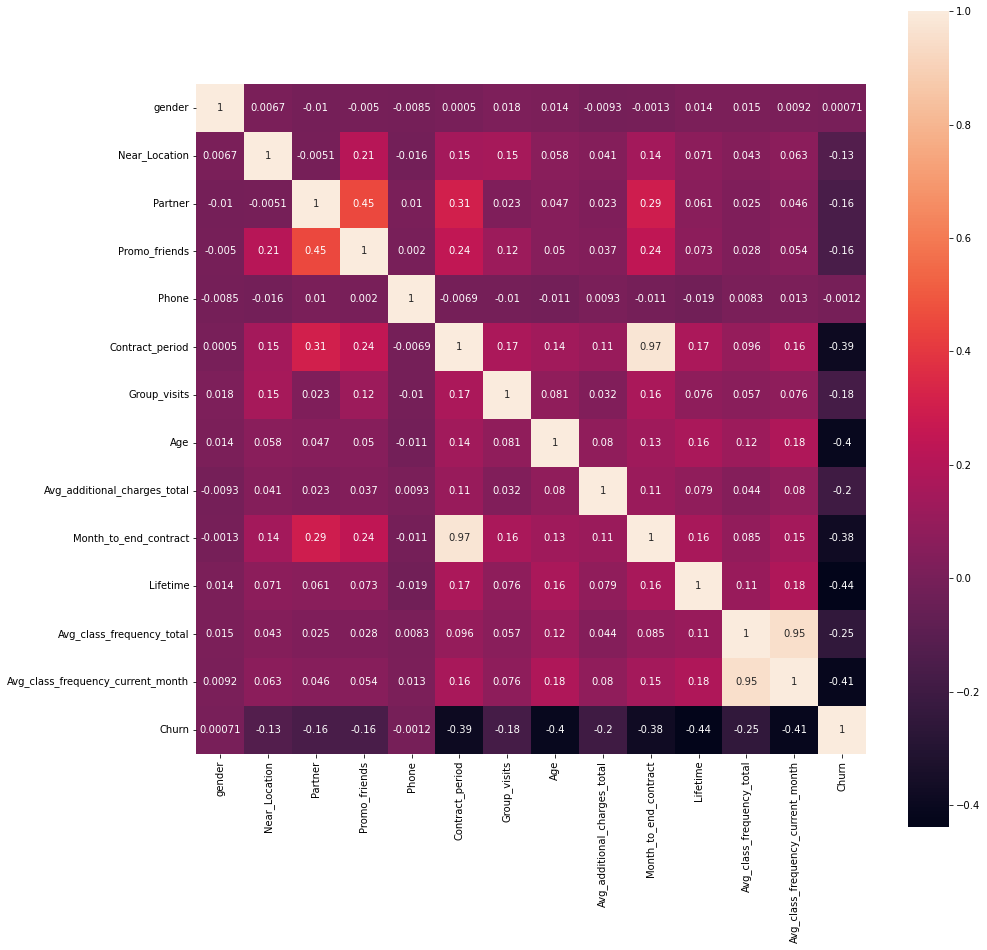

In [9]:
fig, ax = plt.subplots(figsize=(15,15))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(data_corr, annot = True, square=True)
plt.show()

---
Матрица корреляции показывает зависимость между:

    - Сроком до окончания текущего абонемента и Длительностью абонемента
    - Суммарной выручкой от других услуг фитнес-центра и Средней частотой посещений в неделю за предыдущий месяц
    - Партнерством с клубом и Фактом первоначальной записи в рамках акции «приведи друга»
    - Партнерством с клубом и Длительностью абонемента
    
---

In [10]:
churn_0 = data.query('Churn == 0')
churn_1 = data.query('Churn == 1')

Не прекратили пользование:


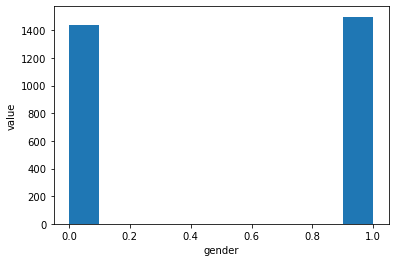

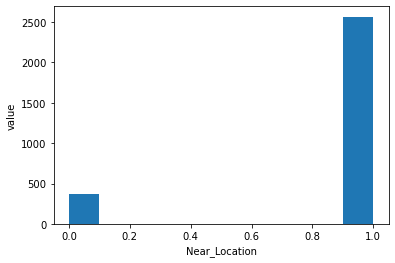

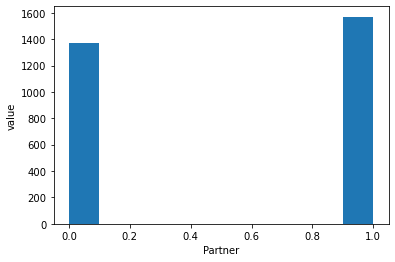

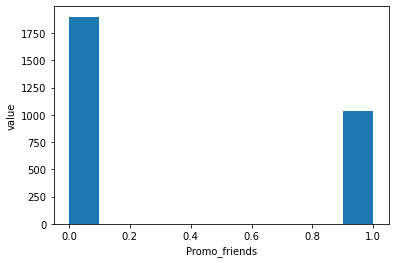

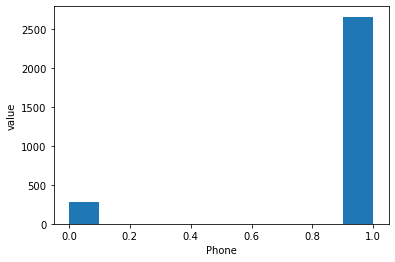

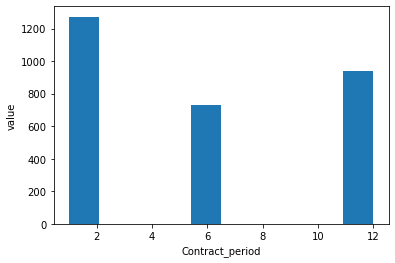

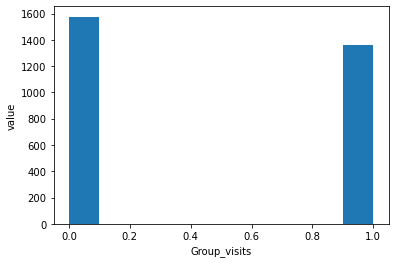

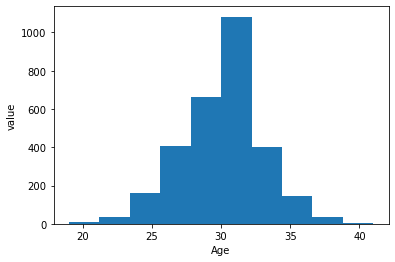

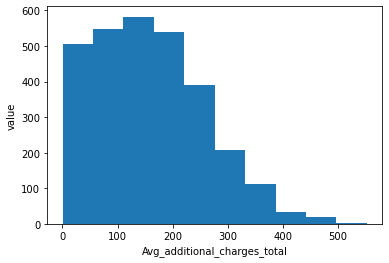

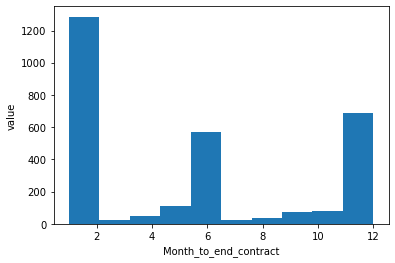

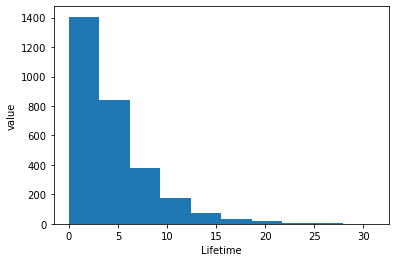

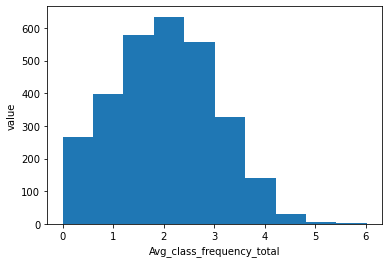

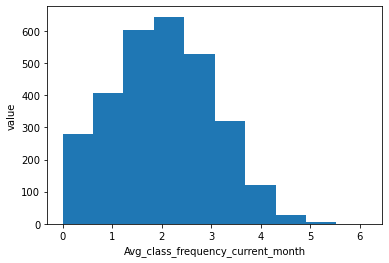

In [11]:
def churn_hists(data):
    for col in data.drop('Churn', axis = 1).columns:
        plt.xlabel(col)
        plt.ylabel('value')
        plt.hist(data[col])
        plt.show()

print('Не прекратили пользование:')
churn_hists(churn_0)

---
Среди пользователей, не прекративших пользование фитнес-клубом:

    - Пользователей в возрасте от 28 до 32 лет больше, чем остальных возрастов. Средний возраст: 30 лет.
    - Немного больше среди посетителей людей с гендером 1.
    - Больше людей, проживающих в районе фитнес-клуба.
    - Больше пользователей являются сотрудниками компаний-партнеров.
    - В соновном пользователи берут абонементы на 3 месяца.
    - Большинство пользователей пришли в рамках акции «приведи друга». 
    - Чаще предпочитают индивидуальные занятия.
    - Суммарная выручка от дополнительных услуг фитнес-центра в среднем от 100 до 230. Средний показатель: 158,5.
    - Больше пользователей со сроком 1-2 месяца до окончания абонемента, 5-6 и 11-12 месяцев. Средний показатель: 5,3 месяца.
    - Большая часть пользователей новые: от 0 до 3 месяцев с момента первого обращения. Средний показатель: 4б8 месяцев.
    - Чаще люди ходят на занятия 2 раза в неделю. Средний показатель: 2.
    - За последний месяц так же средние посещения колеблются от 1 до 2 раз в неделю. Средний показатель: 2.
    
---

Прекратили пользование:


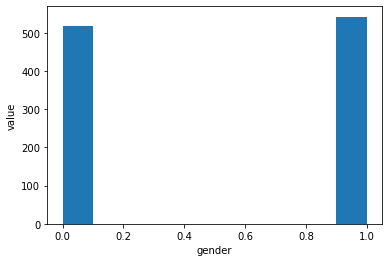

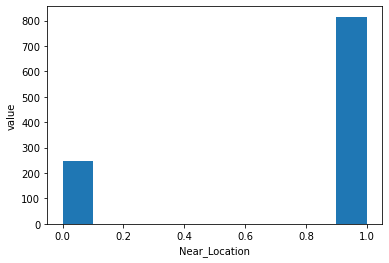

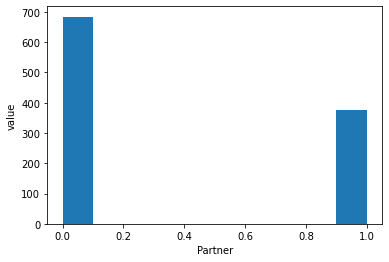

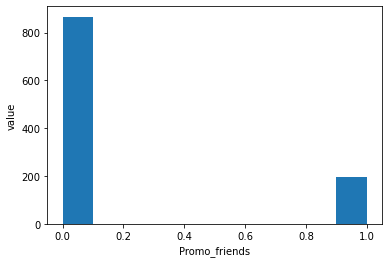

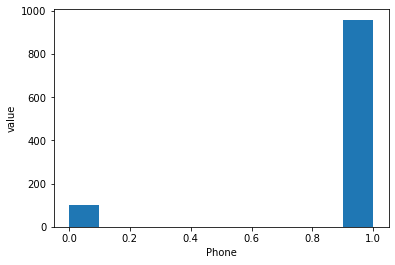

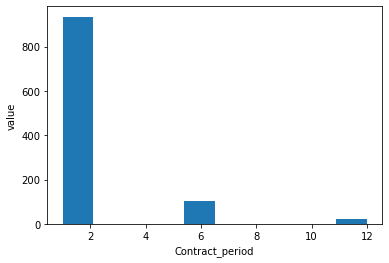

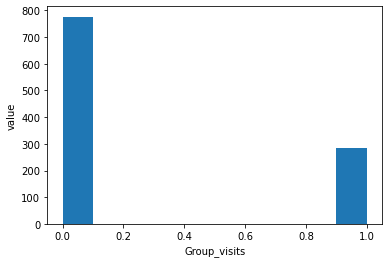

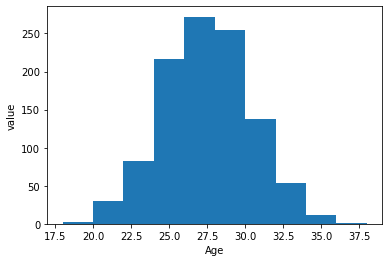

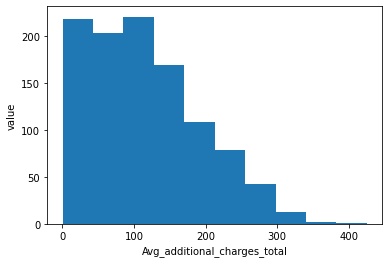

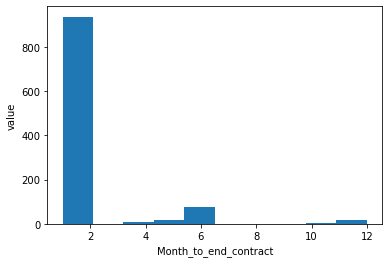

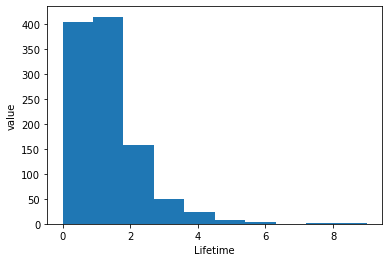

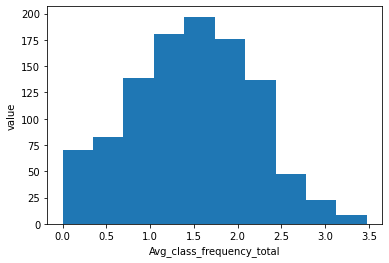

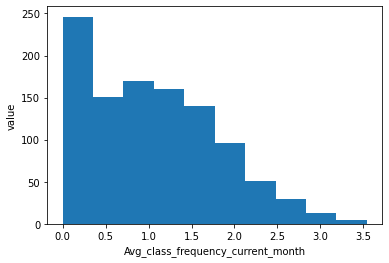

In [12]:
print('Прекратили пользование:')
churn_hists(churn_1)

---
Среди пользователей, прекративших пользование фитнес-клубом:

    - Пользователей в возрасте от 26 до 30 лет больше, чем остальных возрастов. Средний возраст: 27 лет.
    - Немного больше среди посетителей людей с гендером 1.
    - Больше людей, проживающих в районе фитнес-клуба.
    - Больше пользователей не являются сотрудниками компаний-партнеров.
    - В соновном пользователи берут абонементы на 3 месяца.
    - Большинство пользователей пришли не в рамках акции «приведи друга». 
    - Чаще предпочитают индивидуальные занятия.
    - Суммарная выручка от дополнительных услуг фитнес-центра в среднем от 100 до 150. Средний показатель: 115.
    - Больше пользователей со сроком 1-2 месяца до окончания абонемента. Средний показатель: 1,7 месяцев.
    - Большая часть пользователей новые: от 0 до 2 месяцев с момента первого обращения. Средний показатель: 1 месяц.
    - Чаще люди ходят на занятия 1-2 раза в неделю. Средний показатель: 1,5.
    - За последний месяц в среднем посещяют около 1 раза в неделю. Средний показатель: 1.
    
---

### Вывод

По анализу предоставленных данных можно составить примерный портрет пользователя фитнес-клубом:

    Посетитель, прекративший пользование абонементом:
        
        Человек 1 гендера в возрасте около 27 лет, проживающий в районе фитнес-клуба. Пользователь не является сотрудником компании-партнера и не начинает посещение в рамках акций. Оформляет абонемент в среднем на 3 месяца. Предпочитает индивидуальные занятия в зале. Занимается в зале в среднем около 2 месяцев, посещение сводится к 1 разу в неделю. До окончания действия абонемента у него в среднем остается около 1-2 месяцев.

    Посетитель, не прекративший пользование абонементом:
        
        Человек 1 гендера в возрасте около 30 лет, проживающий в районе фитнес-клуба. Пользователь является сотрудником компании-партнера и начинает посещение клуба в рамках акций. Оформляет абонемент в среднем на 6 месяцев. Предпочитает индивидуальные занятия в зале. Занимается в зале в среднем около 4 месяцев, посещение сводится к 2 и более раз в неделю. До окончания действия абонемента у него в среднем остается около 5 месяцев.
        
Наблюдаются особенности в поведении людей, прекращающих пользование абонементом: низкая посещаемость и возраст младше 30 лет, абонемент оформляет на самый короткий срок. 

Так же большая часть постоянных клиентов являются сотрудниками компаний-партнеров, а так же начинают посещения с участия в акции "приведи друга". 
       

## Построение модели прогнозирования оттока клиентов

In [13]:
X = data.drop('Churn', axis=1)
y = data['Churn'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#задаю модель на основе алгоритма логистической регрессии
model = LogisticRegression(solver='liblinear')

model.fit(X_train, y_train)

predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

#задаю модель на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

In [14]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    
print_all_metrics(y_test, predictions, probabilities, title='Метрики для модели логистической регрессии:')
print_all_metrics(y_test, rf_predictions, rf_probabilities, title='Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.89
	Recall: 0.84
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83


### Вывод

Мной было рассмотрено два алгоритма: логистическая регрессия и случайный лес. 

Судя по метрикам, модель логистической регресси работает лучше, чем случайный лес.

## Кластеризация клиентов

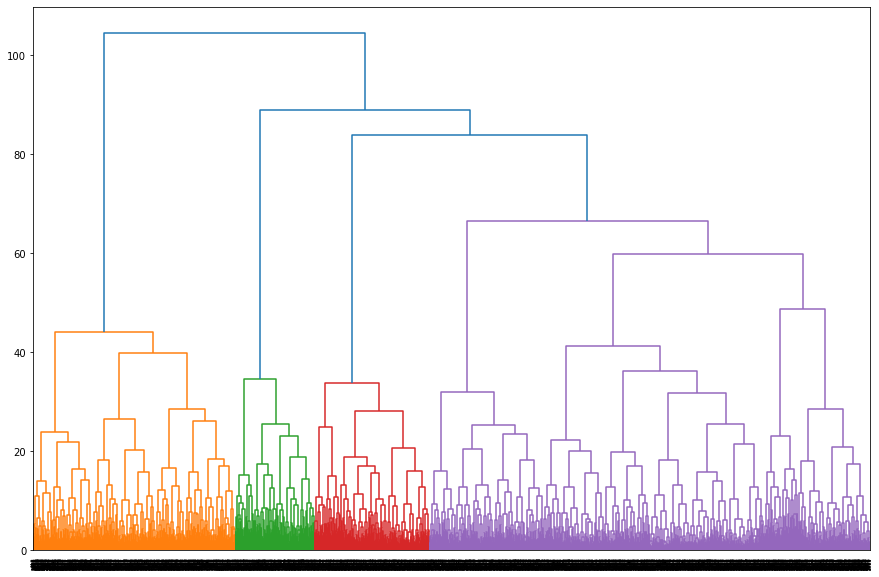

In [15]:
#стандартизирую данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# #матрица расстояний
linked = linkage(X_sc, method = 'ward')

# #строю дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

---
На основании дендрограммы можно выделить 4 кластера для дальнейшей кластеризации.

    Но я буду использовать 5, как в задании.

---

In [16]:
#задаю число кластеров
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)

#сохраняю метки кластера в датасет
data['cluster_km'] = labels

#вывожу среднее значение признаков по кластерам
data.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


---
- По средним значениям признаков сразу можно заметить два кластера(2 и 3) точно разделенные по признаку местоположения. 
- Признак Contract_period так же довольно отчетливо разделен на группы.
- Кластеры, со средним возрастом пользователей окло 30 лет, имеют признак оттока Churn ближе к 0, что подтверждает предыдущие выводы о портрете пользователя.
- Кластеры 2 и 3 менее надежны, так как больше остальных склонны к оттоку.

---

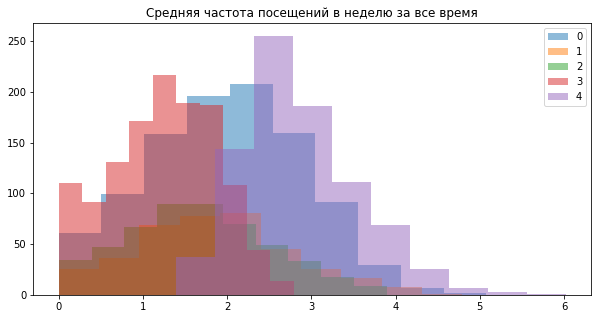

In [17]:
claster_0 = data.query('cluster_km == 0')['Avg_class_frequency_total']
claster_1 = data.query('cluster_km == 1')['Avg_class_frequency_total']
claster_2 = data.query('cluster_km == 2')['Avg_class_frequency_total']
claster_3 = data.query('cluster_km == 3')['Avg_class_frequency_total']
claster_4 = data.query('cluster_km == 4')['Avg_class_frequency_total']

fig = plt.figure(figsize = (10,5))
plt.hist(claster_0, alpha=0.5, label='0')
plt.hist(claster_1, alpha=0.5, label='1')
plt.hist(claster_2, alpha=0.5, label='2')
plt.hist(claster_3, alpha=0.5, label='3')
plt.hist(claster_4, alpha=0.5, label='4')
plt.legend(loc='upper right')
plt.title('Cредняя частота посещений в неделю за все время')
plt.show()

---
- Кластер номер 4 имеет на много больше посетителей, совершающих 2 и более походов в зал в неделю за все время пользования.
- 3 кластер можно считать наименее активным.

---

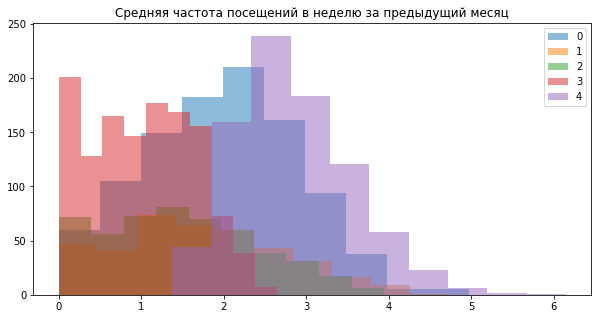

In [18]:
claster_0 = data.query('cluster_km == 0')['Avg_class_frequency_current_month']
claster_1 = data.query('cluster_km == 1')['Avg_class_frequency_current_month']
claster_2 = data.query('cluster_km == 2')['Avg_class_frequency_current_month']
claster_3 = data.query('cluster_km == 3')['Avg_class_frequency_current_month']
claster_4 = data.query('cluster_km == 4')['Avg_class_frequency_current_month']

fig = plt.figure(figsize = (10,5))
plt.hist(claster_0, alpha=0.5, label='0')
plt.hist(claster_1, alpha=0.5, label='1')
plt.hist(claster_2, alpha=0.5, label='2')
plt.hist(claster_3, alpha=0.5, label='3')
plt.hist(claster_4, alpha=0.5, label='4')
plt.legend(loc='upper right')
plt.title('Средняя частота посещений в неделю за предыдущий месяц')
plt.show()

---
- 4 кластер так же можно считать самым активным среди всех за предыдущий месяц. 
- Кластер 3 так же можно считать самым неактивным среди всех за предыдущий месяц.

---

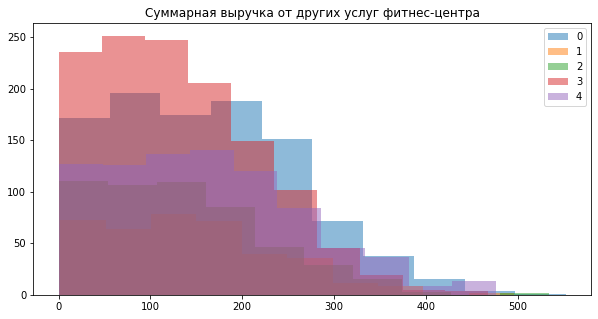

In [19]:
claster_0 = data.query('cluster_km == 0')['Avg_additional_charges_total']
claster_1 = data.query('cluster_km == 1')['Avg_additional_charges_total']
claster_2 = data.query('cluster_km == 2')['Avg_additional_charges_total']
claster_3 = data.query('cluster_km == 3')['Avg_additional_charges_total']
claster_4 = data.query('cluster_km == 4')['Avg_additional_charges_total']

fig = plt.figure(figsize = (10,5))
plt.hist(claster_0, alpha=0.5, label='0')
plt.hist(claster_1, alpha=0.5, label='1')
plt.hist(claster_2, alpha=0.5, label='2')
plt.hist(claster_3, alpha=0.5, label='3')
plt.hist(claster_4, alpha=0.5, label='4')
plt.legend(loc='upper right')
plt.title('Суммарная выручка от других услуг фитнес-центра')
plt.show()

---
По размеру суммарной выручки от других услуг фитнес-центра 3 кластер можно считать самым прибыльным. Представитель данного кластера обычно тратит не самую боьшую сумму денег, но они превосходят другие кластеры по количеству.

---

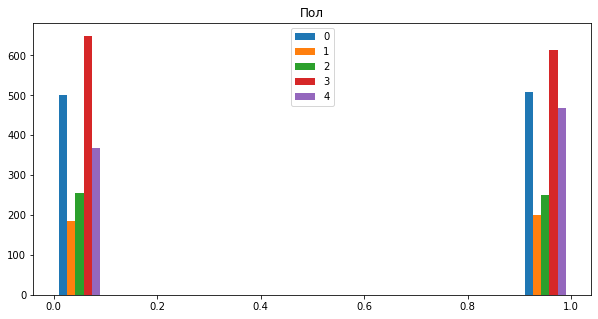

In [20]:
claster_0 = data.query('cluster_km == 0')['gender']
claster_1 = data.query('cluster_km == 1')['gender']
claster_2 = data.query('cluster_km == 2')['gender']
claster_3 = data.query('cluster_km == 3')['gender']
claster_4 = data.query('cluster_km == 4')['gender']

fig = plt.figure(figsize = (10,5))
plt.hist([claster_0, claster_1, claster_2, claster_3, claster_4], label=['0', '1', '2', '3', '4'])
plt.legend(loc='upper center')
plt.title('Пол')
plt.show()

---
- Самым многочисленным можно считать 3 кластер.
- 1 кластер самый маленький по количеству пользователей.

---

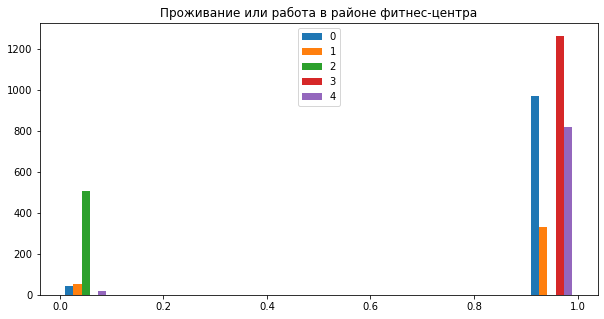

In [21]:
claster_0 = data.query('cluster_km == 0')['Near_Location']
claster_1 = data.query('cluster_km == 1')['Near_Location']
claster_2 = data.query('cluster_km == 2')['Near_Location']
claster_3 = data.query('cluster_km == 3')['Near_Location']
claster_4 = data.query('cluster_km == 4')['Near_Location']

fig = plt.figure(figsize = (10,5))
plt.hist([claster_0, claster_1, claster_2, claster_3, claster_4], label=['0', '1', '2', '3', '4'])
plt.legend(loc='upper center')
plt.title('Проживание или работа в районе фитнес-центра')
plt.show()

---
- В кластере 2 собраны только те пользователи, которые проживают или работают в другом районе.
- 3 кластер собрал в себе пользователей проживающих или работающих в районе с фитнес-центра.
- В общем мы имеем боьше пользователей, проживающих в районе фитнес-центра.

---

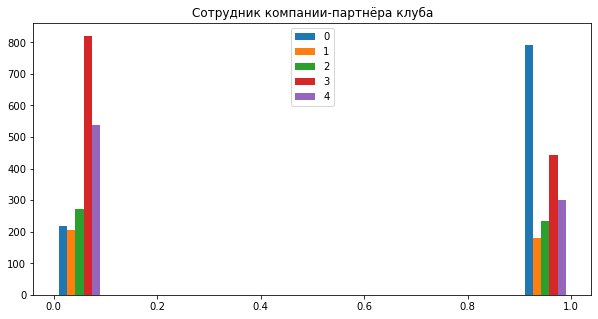

In [22]:
claster_0 = data.query('cluster_km == 0')['Partner']
claster_1 = data.query('cluster_km == 1')['Partner']
claster_2 = data.query('cluster_km == 2')['Partner']
claster_3 = data.query('cluster_km == 3')['Partner']
claster_4 = data.query('cluster_km == 4')['Partner']

fig = plt.figure(figsize = (10,5))
plt.hist([claster_0, claster_1, claster_2, claster_3, claster_4], label=['0', '1', '2', '3', '4'])
plt.legend(loc='upper center')
plt.title('Сотрудник компании-партнёра клуба')
plt.show()

---
- Кластер 0 лидирует по количеству сотрудников компаний-партнеров.
- В 3 и 4 кластерах сотрудников компаний-партнеров меньше.

---

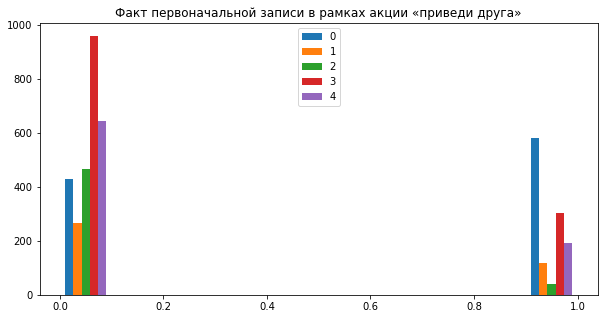

In [23]:
claster_0 = data.query('cluster_km == 0')['Promo_friends']
claster_1 = data.query('cluster_km == 1')['Promo_friends']
claster_2 = data.query('cluster_km == 2')['Promo_friends']
claster_3 = data.query('cluster_km == 3')['Promo_friends']
claster_4 = data.query('cluster_km == 4')['Promo_friends']

fig = plt.figure(figsize = (10,5))
plt.hist([claster_0, claster_1, claster_2, claster_3, claster_4], label=['0', '1', '2', '3', '4'])
plt.legend(loc='upper center')
plt.title('Факт первоначальной записи в рамках акции «приведи друга»')
plt.show()

---
- В общем в акции «приведи друга» участвовало не так много пользователей.
- В кластере 0 больше участников акции.
- 3 и 4 кластеы больше чем на половину состоят из пользователей, не принявших участие в акции.

---

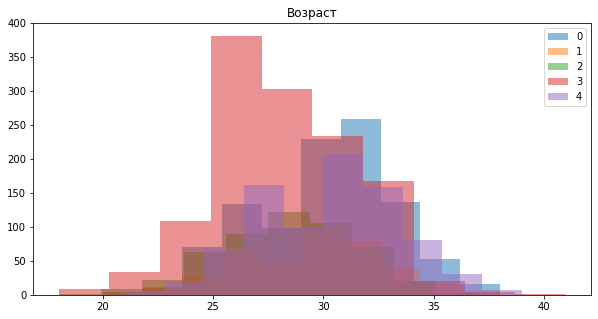

In [24]:
claster_0 = data.query('cluster_km == 0')['Age']
claster_1 = data.query('cluster_km == 1')['Age']
claster_2 = data.query('cluster_km == 2')['Age']
claster_3 = data.query('cluster_km == 3')['Age']
claster_4 = data.query('cluster_km == 4')['Age']

fig = plt.figure(figsize = (10,5))
plt.hist(claster_0, alpha=0.5, label='0')
plt.hist(claster_1, alpha=0.5, label='1')
plt.hist(claster_2, alpha=0.5, label='2')
plt.hist(claster_3, alpha=0.5, label='3')
plt.hist(claster_4, alpha=0.5, label='4')
plt.legend(loc='upper right')
plt.title('Возраст')
plt.show()

---
- 3 кластер состоит в основном из людей от 25 до 28 лет.
- 0 и 4 кластеры имеют в своих рядах больше людей в возрасте от 30 до 35.

---

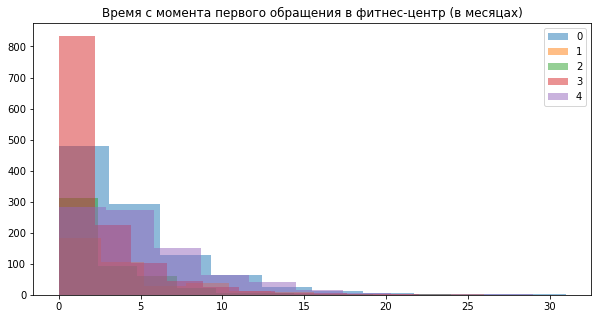

In [25]:
claster_0 = data.query('cluster_km == 0')['Lifetime']
claster_1 = data.query('cluster_km == 1')['Lifetime']
claster_2 = data.query('cluster_km == 2')['Lifetime']
claster_3 = data.query('cluster_km == 3')['Lifetime']
claster_4 = data.query('cluster_km == 4')['Lifetime']

fig = plt.figure(figsize = (10,5))
plt.hist(claster_0, alpha=0.5, label='0')
plt.hist(claster_1, alpha=0.5, label='1')
plt.hist(claster_2, alpha=0.5, label='2')
plt.hist(claster_3, alpha=0.5, label='3')
plt.hist(claster_4, alpha=0.5, label='4')
plt.legend(loc='upper right')
plt.title('Время с момента первого обращения в фитнес-центр (в месяцах)')
plt.show()

---
3 кластер можно считать самым молодым по данному признаку.

---

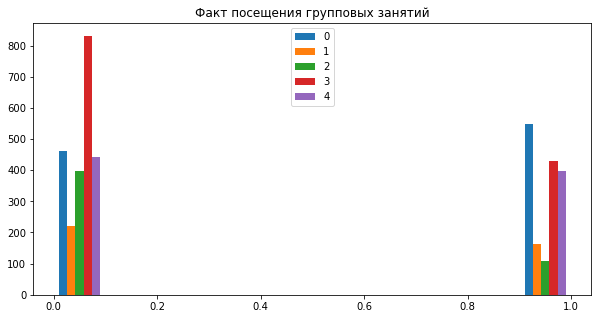

In [26]:
claster_0 = data.query('cluster_km == 0')['Group_visits']
claster_1 = data.query('cluster_km == 1')['Group_visits']
claster_2 = data.query('cluster_km == 2')['Group_visits']
claster_3 = data.query('cluster_km == 3')['Group_visits']
claster_4 = data.query('cluster_km == 4')['Group_visits']

fig = plt.figure(figsize = (10,5))
plt.hist([claster_0, claster_1, claster_2, claster_3, claster_4], label=['0', '1', '2', '3', '4'])
plt.legend(loc='upper center')
plt.title('Факт посещения групповых занятий')
plt.show()

---
- 3 кластер предпочитает индивидуальные занятия.
- 0 кластер единственный из всех, в котором пользователи посещают групповые занятия чаще индивидуальных.

---

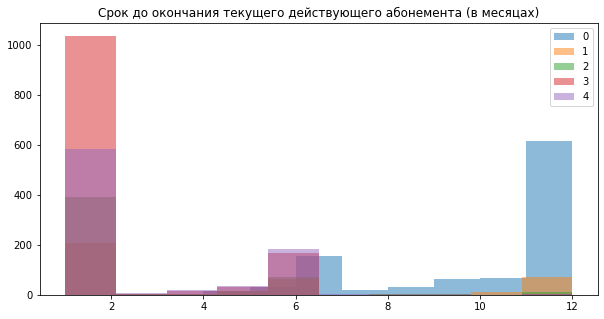

In [27]:
claster_0 = data.query('cluster_km == 0')['Month_to_end_contract']
claster_1 = data.query('cluster_km == 1')['Month_to_end_contract']
claster_2 = data.query('cluster_km == 2')['Month_to_end_contract']
claster_3 = data.query('cluster_km == 3')['Month_to_end_contract']
claster_4 = data.query('cluster_km == 4')['Month_to_end_contract']

fig = plt.figure(figsize = (10,5))
plt.hist(claster_0, alpha=0.5, label='0')
plt.hist(claster_1, alpha=0.5, label='1')
plt.hist(claster_2, alpha=0.5, label='2')
plt.hist(claster_3, alpha=0.5, label='3')
plt.hist(claster_4, alpha=0.5, label='4')
plt.legend(loc='upper right')
plt.title('Срок до окончания текущего действующего абонемента (в месяцах)')
plt.show()

---
- 3 и 4 кластеры чаще покупают краткосрочные абонементы.
- 0 кластер больше отдает предпочтение годовым абонементам.

---

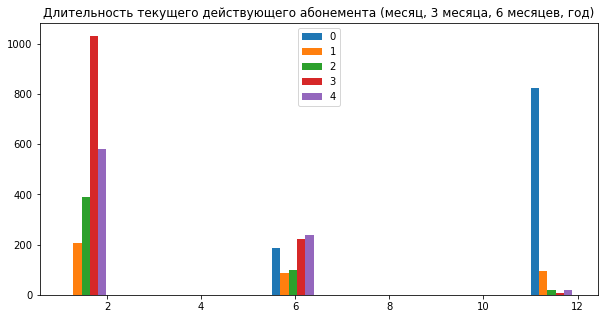

In [28]:
claster_0 = data.query('cluster_km == 0')['Contract_period']
claster_1 = data.query('cluster_km == 1')['Contract_period']
claster_2 = data.query('cluster_km == 2')['Contract_period']
claster_3 = data.query('cluster_km == 3')['Contract_period']
claster_4 = data.query('cluster_km == 4')['Contract_period']

fig = plt.figure(figsize = (10,5))
plt.hist([claster_0, claster_1, claster_2, claster_3, claster_4], label=['0', '1', '2', '3', '4'])
plt.legend(loc='upper center')
plt.title('Длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)')
plt.show()

---
- В подтверждение предыдущего графика можно сказать что 0 кластер больше склонен к покупке годовых абонементов.
- 3 и 4 кластеры больше отдают предпочтение абонементам на 3 и 6 месяцев.

---

## Общий вывод

Итак, мы имеем несколько выделающихся кластеров с характерным поведением:

    0 кластер: Средний возраст от 30 до 35, сотрудники компаний-партнеров, участники акции "приведи друга". Посещают зал в среднем больше 2 раз в неделю, предпочитают групповые занятия. Чаще всего оформляют абонементы на год.
    
    3 кластер: Средний возраст от 25 до 30 лет, чаще не являются сотрудниками компаний-партнеров. В акции "приведи друга" почти не участвуют. Посещают зал в среднем 1-2 раза в неделю, почти не посещают групповые занятия.Чаще всего оформляют абонементы на 3 месяца. Являются активными пользователями дополнительных услуг фитне-центра: кафе, спорт-товары, косметический и массажный салон.
    
    4 кластер: Средний возраст от 30 до 35, чаще не являются сотрудниками компаний-партнеров. В акции "приведи друга" почти не участвуют. Посещают зал в среднем больше 2 раз в неделю, в равной степени интересуются как групповыми, так и индивидуальными занятиями. Чаще всего оформляют абонемент на 3 и 6 месяцев. 
    
3 кластер больше остальных склонен к оттоку, чем остальные. Поэтому предлагаю два пути взаимодействия с клиентом: 

    1) Для пользователей склонных к оттоку, как в 3 кластере, можно сделать уклон на предоставление дополнительных услуг фитнес-центра и акции связанные с ними. Так же немаловажным будет предоставление возможности занятий с индивидуальным тренером и составление индивидуальной программы тренировок. 
    
    2) Для пользователей не склонных к оттоку, как в 0 и 4 кластерах, необходимо сделать упор на предоставление широкого спектра групповых занятий, введение скидочных акций и т.д. 